**<center><span style="font-size: 30px;">Поиск точек для роста прибыли салона Waves: расчет с Google Таблицах </span></center>**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Отчет-о-выручке-и-расходах" data-toc-modified-id="Отчет-о-выручке-и-расходах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Отчет о выручке и расходах</a></span></li><li><span><a href="#Отчет-о-рентабельности-промоакций" data-toc-modified-id="Отчет-о-рентабельности-промоакций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отчет о рентабельности промоакций</a></span></li><li><span><a href="#Отчёт-о-популярности-товаров-и-услуг-и-выручке-от-них" data-toc-modified-id="Отчёт-о-популярности-товаров-и-услуг-и-выручке-от-них-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Отчёт о популярности товаров и услуг и выручке от них</a></span></li></ul></li><li><span><a href="#Презентация-результатов" data-toc-modified-id="Презентация-результатов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Презентация результатов</a></span></li></ul></div>

**<span style="font-size: 20px;">Презентация: <https://docs.google.com/spreadsheets/d/1Iht8wimLi1JmfU5En1Fe19tL-01k1pEQ/edit?usp=sharing&ouid=113421585435035643227&rtpof=true&sd=true></span>**

# Техническое задание

**Цель исследования** - анализ доходов и рассходов салона для кудрявых Waves для того, чтобы бизнес выбрал стратегию для увеличения прибыли.

Для реальзациии этого необходимо решить следующие **задачи**:
- Посчитать, сколько салон тратит на промоакции и окупаются ли эти вложения, а именно:
    - посмотреть в разрезе по промокампаниям, что даёт больший эффект в привлечении клиентов — какие промокоды используются чаще;
    - изучить, сколько салон недополучает выручки из-за скидок;
    - посчитать суммы среднего чека для каждой промокампании.
- Проанализировать, какие товары продаёт салон и какие услуги предоставляет — что пользуется наибольшим спросом у клиентов.

В работе должны быть учитаны следующие **замечания от старшего аналитика**:
- Сейчас данные вносятся в таблицу вручную разными людьми.
- В салоне есть один кассовый аппарат с терминалом. Оплату картами салон принимает, а вот счета не выставляет, поэтому других форм безналичной оплаты не предусмотрено.
- По промокодам клиенты могут получить скидки в 5%, 10%, 15%, 20% или 50%.
- Прайс-лист в салоне единый для мастеров одного уровня.
- Салон находится в России, поэтому дата и время заказа могут исказиться, если в региональных настройках Google Таблиц не указано «Россия».

# Предобработка данных

План предобработки:
- визульная оценка данных
- приведение информации к единому стилю
- изменение форматов данных
- удаление дубликатов
- обработка пропусков
- удаление пробелов
- сортировка данных
- обработка аномальных значений
- добавление дополнительных столбцов


Таблица Export

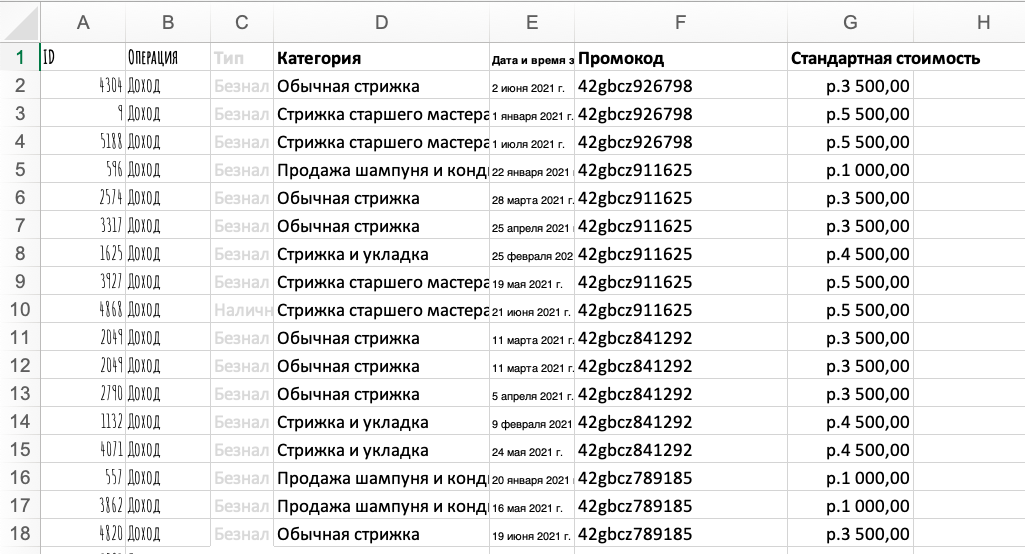

В первую очередь необходмо отформатировать текст. Выберем шрифт Roboto 12. Отсортируем по `ID`.
- Удалим пустые строки и дубликаты. Отсортируем по `ID`.
- Приведем столбец `Дата и время` к формату времени. Для этого заменим от *2021 г.* на *2021*.
- Удалим пробелы в стобце `Доход`.
- Заменим способ оплаты *Карта* на *Безнал* в столбце `Тип`.
- В столбце `Категория` встречаются опечатки: устраняем их.
- Обработка пропусков: создаем технический лист с прайс-листом салона, используем функцию *UNIQUE()*. Заполняем с помощю *VLOOKUP()* пропуски. Пропуски в `Промокод` оставляем.

Таблица promocodes

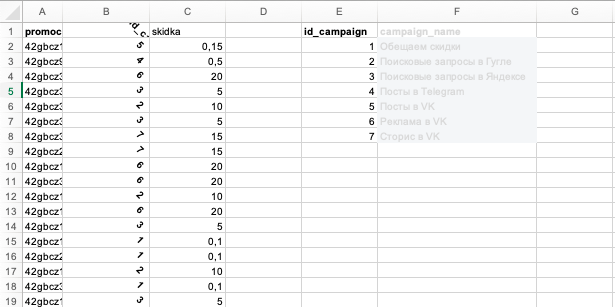

Также отформатируем, проверим на дубликаты. Поменяем заголовок `skidka` на `discount_prct`. В этом столбце приведем скидки к единому виду "_%". Пробелов, дубликатов и пропусков не обнаружено.

Создаем следующие столбцы:
- `Вид транзакции` (Услуга/Товар/Расходы) - чтобы рассчитать, сколько прибыли приносят отдельные услуги и товары;
- Столбец `Месяц транзакции` - отфильтровать по месяцу транзакции;
- Столбцы `ID промокампании` и `Название промокампании` - проанализировать промоакции; 
- Столбцы `Процент скидки`, `Сумма скидки в рублях` и `Итоговая стоимость с учётом скидки` - рассчитать итоговую стоимость каждой транзакции.

Экспортируем пять строк таблицы для ясности картины.

In [1]:
import pandas as pd
waves = pd.read_excel('/Users/anastasia/Downloads/Data_from_Waves (3).xlsx', sheet_name = 'Export')
print(waves.head())

   ID Операция       Тип                 Категория Дата и время заказа  \
0   1    Доход    Безнал         Стрижка и укладка          2021-01-01   
1   2    Доход    Безнал           Обычная стрижка          2021-01-01   
2   3    Доход  Наличные           Продажа шампуня          2021-01-01   
3   4    Доход    Безнал         Стрижка и укладка          2021-01-01   
4   5    Доход    Безнал  Стрижка старшего мастера          2021-01-01   

   Месяц транзакции       Промокод  Стандартная стоимость Вид транзакции  \
0                 1            NaN                 4500.0         Услуга   
1                 1            NaN                 3500.0         Услуга   
2                 1            NaN                  500.0          Товар   
3                 1            NaN                 4500.0         Услуга   
4                 1  42gbcz1044846                 5500.0         Услуга   

  Номер компании Название промкомпании  Процент скидки  Сумма скидки в рублях  \
0              - 

In [2]:
waves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  5356 non-null   int64         
 1   Операция                            5356 non-null   object        
 2   Тип                                 5356 non-null   object        
 3   Категория                           5356 non-null   object        
 4   Дата и время заказа                 5356 non-null   datetime64[ns]
 5   Месяц транзакции                    5356 non-null   int64         
 6   Промокод                            600 non-null    object        
 7   Стандартная стоимость               5356 non-null   float64       
 8   Вид транзакции                      5356 non-null   object        
 9   Номер компании                      5356 non-null   object        
 10  Название промкомпании   

In [3]:
waves_promo = pd.read_excel('/Users/anastasia/Downloads/Data_from_Waves (3).xlsx', sheet_name = 'promocodes')
print(waves_promo.head())

       promocode  id_campaign  discont_prcnt  Unnamed: 3  id_campaign.1  \
0  42gbcz1044846            5           0.15         NaN            1.0   
1   42gbcz926798            4           0.50         NaN            2.0   
2  42gbcz3340340            6           0.20         NaN            3.0   
3  42gbcz3389430            3           0.50         NaN            4.0   
4  42gbcz3469079            2           0.10         NaN            5.0   

                 campaign_name  
0               Обещаем скидки  
1    Поисковые запросы в Гугле  
2  Поисковые запросы в Яндексе  
3             Посты в Telegram  
4                   Посты в VK  


Заметим, что четвертый столбец - разграничивает таблицы с процентом скидки и с названием промокомпаний.

In [4]:
waves_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promocode      114 non-null    object 
 1   id_campaign    114 non-null    int64  
 2   discont_prcnt  114 non-null    float64
 3   Unnamed: 3     0 non-null      float64
 4   id_campaign.1  7 non-null      float64
 5   campaign_name  7 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 5.5+ KB


**Вывод:** в результате предобрабоки данные отформатированы,удалены дубликаты и ошибки в заполнении, устранены по возможности пропуски, обработаны аномальные значения, подготовлены столбцы для анализа. В результате обработки осталось **5356 строк.**

# Исследовательский анализ данных

Задача — на основе таблицы, которую предоставил салон, сформировать отчёт на трёх листах: 
- отчёт о выручке и расходах с детализацией по каждой категории;
- отчёт о рентабельности промокампаний;
- отчёт о популярности товаров и услуг и выручке, которую они приносят.

## Отчет о выручке и расходах

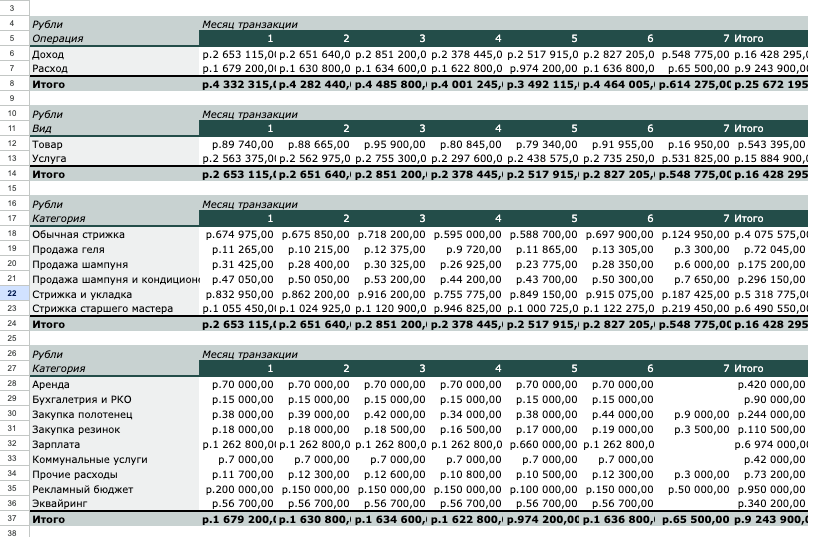

Больше всего дохода за стрижку старшим мастером: за 7 месяцев 6,5 млн руб. Расходов за 7 месяцев больше на зароботную плату (7 млн руб) и рекламу (1 млн руб).

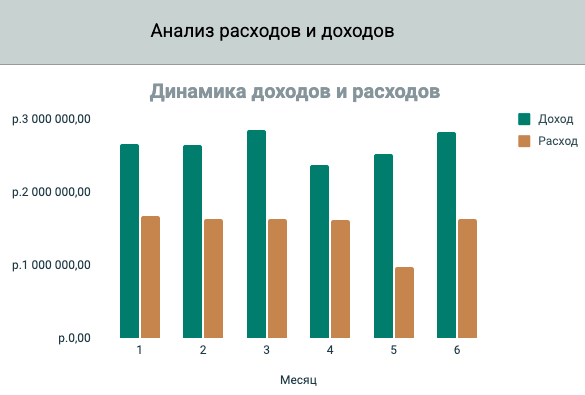

Расходы остаюся на постоянном уровне, за исключением мая. Это связано с графой расходов на оплату труда. Возможно, были увольнения или дургими внутренними изменениями. Также в мае урезан бюджет на рекламу. Данные обстоятельства не оказали особого влияния на доход. Доход за март несколько вырос, возможно это связано с 8 марта. 

## Отчет о рентабельности промоакций

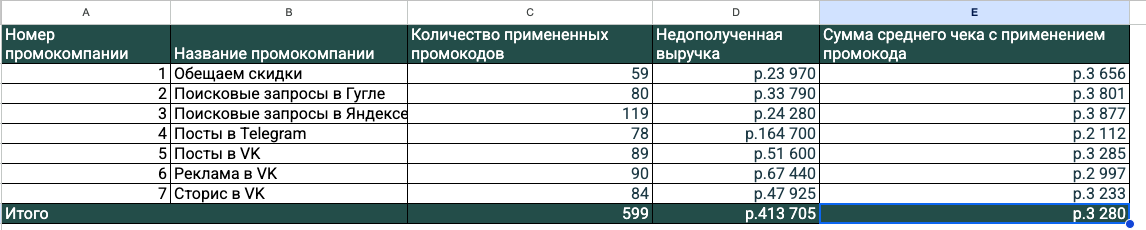

Больше всего применяемых промокодов от Яндекс, при этом недополученной выручке больше от Telegram. Это связано с тем, что промокодыв Телеграм были даны на 50%, в то время, как от Яндекс на 5%.

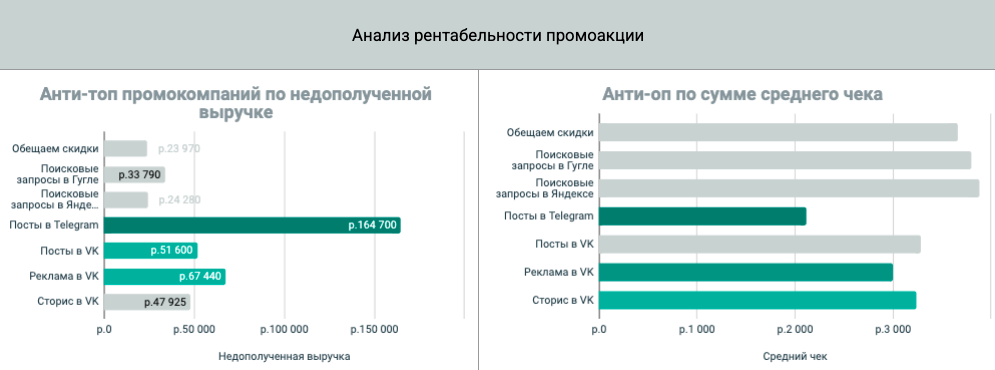

## Отчёт о популярности товаров и услуг и выручке от них

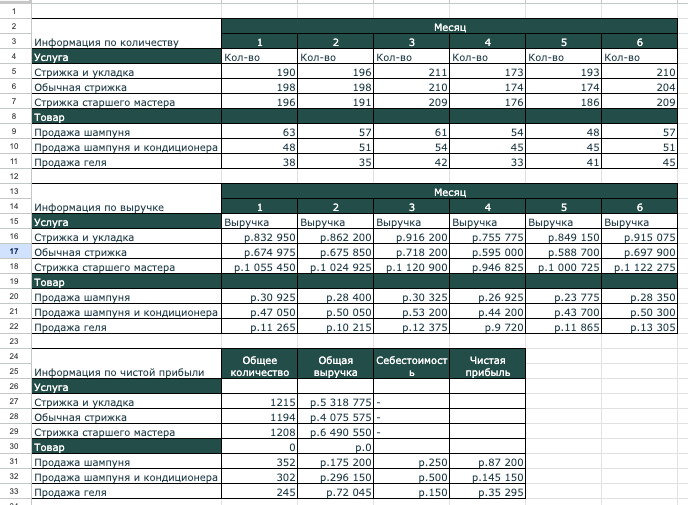

Чаще ходят на стрижку и укладку. Меньшим спросом пользуется гель.

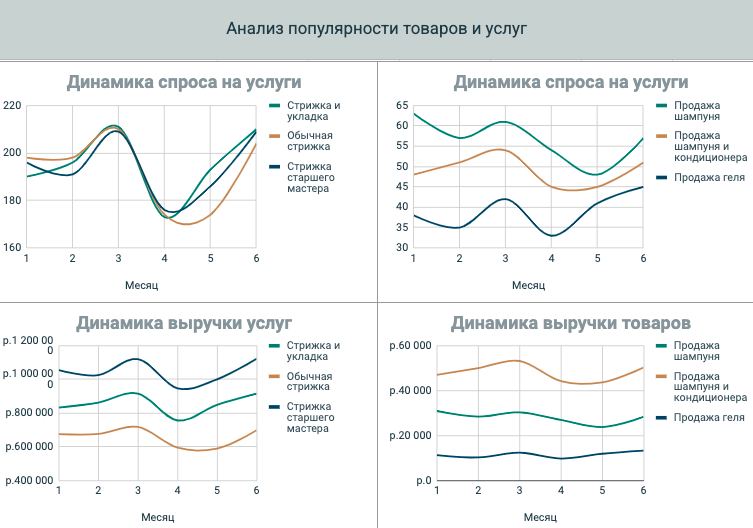

В спросе на товары и услуги всё стабильно, но можно заметить восходящий тренд на гель для волос. Возможно, больше людей стали узнавать о важности геля для кудрявых волос благодаря миссии салона. Поэтому гель и стал набирать популярность. Комбо из шампуня и кондиционера для волос продаётся лучше и приносит больше чистой прибыли, чем один шампунь. Кондиционер в салоне отдельно не продаётся, а одного шампуня клиентам для ухода недостаточно.

**Вывод:** самая популярная услуга - стрижка и укладка, а самая прибыльная - стрижка старшим мастером. Самый популярный товар - шампунь, а менее - гель. Посты в Телеграм приносят наибольший убыток по выручке и наименьший средний чек, так как дают наибольшую скидку в размере 50%. После мая продажа геля имеют положительную динамику. Шампунь с кондиционером продаются лучше, чем шампунь.

# Презентация результатов

**<span style="font-size: 20px;">Презентация: <https://docs.google.com/spreadsheets/d/1Iht8wimLi1JmfU5En1Fe19tL-01k1pEQ/edit?usp=sharing&ouid=113421585435035643227&rtpof=true&sd=true></span>**

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
В результате анализа данных салона Waves была проделана предобработка данных о транзакциях и промокомпаниях. 

На основе исследовательского анализа данных можно сделать следующие выводы:
- тенденции к росту доходов не наблюдается, необходимо оптимизировать рассходы: в мае снижение трат на зароботную плату и маркетинг не повлияло на выручку;
- две кампании «Посты в Telegram» и «Реклама в VK» привели к наибольшей недополученной выручке за счёт скидок и средний чек в рамках этих акций самый низкий. Пока неизвестно, привлекают ли такие акции новых клиентов и сложно судить об их рентабельности;
- спрос на товары и услуши стабилен, за исключения положительно динамики продаж геля;
- шампунь с кондиционером продается лучше просто шампуня.

Можно выделить следующие рекомендации:
- оптимизировать расходы;
- начать вести базу продаж: так можно будет судить о привлечении постоянных клиентов;
- пересмотреть затраты на промокомпании;
- расширить линейку товаров: добавить маски, разнообразить стайлинги и комбинации товаров.
</div>